In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras import applications
from keras.utils import plot_model
from keras.applications.imagenet_utils import decode_predictions
import os

# Useful Functions and Definitions
- These are some useful things as well as definitions you may treat as parameters

In [1]:
# Use this to get a list of class labels in the order the model is trained on
def get_classes():
    classes = []
    with open('classes.txt') as file:
        for line in file:
            if line[-1] == '\n':
                line = line[:-1]
            classes.append(line)
    return classes

In [2]:
# The paths to the training and test set folders
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
# The target image size to rescale to, number of classes, and number of epochs
image_size = (256, 256, 3)
num_classes = 151
epochs = 35

In [4]:
# Where to save the model
save_modelpath = "model2.h5"

# Training Model
- Use the following cells to train a CNN using Keras
- Use the cells in the next section (Loading Model) to use a pretrained model
a lot of this was based on the tutorial found here: https://medium.com/analytics-vidhya/pok%C3%A9mon-classification-974a10621381

In [34]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
    pop = os.listdir(train_dir + '/' + pokemon)
    test_data = random.sample(pop, 15)
    print(test_data)
    for f in test_data:
        shutil.copy(train_dir + '/' + pokemon + '/' +f , 
                    test_dir + '/' + pokemon +'/')
        
def clear_and_create_test_dir():
    shutil.rmtree(test_dir)
    os.mkdir(test_dir)
    for pokemon in os.listdir(train_dir):
        os.mkdir(os.path.join(test_dir, pokemon))
        prep_test_data(pokemon, train_dir, test_dir)

## Preparing Testing and Validation folders


In [18]:
# Cleans and/or creates the test directory

clear_and_create_test_dir()

['Abra30.jpg', 'Abra8.jpg', 'Abra25.jpg', 'Abra10.jpg', 'Abra24.jpg', 'Abra12.jpg', 'Abra45.jpg', 'Abra56.jpg', 'Abra26.jpg', 'Abra7.jpg', 'Abra50.jpg', 'Abra23.jpg', 'Abra63.jpg', 'Abra32.jpg', 'Abra69.jpg']
['Aerodactyl14.jpg', 'Aerodactyl9.jpg', 'Aerodactyl35.jpg', 'Aerodactyl55.jpg', 'Aerodactyl58.jpg', 'Aerodactyl29.jpg', 'Aerodactyl19.jpg', 'Aerodactyl22.jpg', 'Aerodactyl33.jpg', 'Aerodactyl13.jpg', 'Aerodactyl54.jpg', 'Aerodactyl2.jpg', 'Aerodactyl18.jpg', 'Aerodactyl1.jpg', 'Aerodactyl10.jpg']
['Alakazam88.jpg', 'Alakazam87.jpg', 'Alakazam5.jpg', 'Alakazam99.jpg', 'Alakazam83.jpg', 'Alakazam90.jpg', 'Alakazam78.jpg', 'Alakazam75.jpg', 'Alakazam100.jpg', 'Alakazam70.jpg', 'Alakazam62.jpg', 'Alakazam22.jpg', 'Alakazam15.jpg', 'Alakazam64.jpg', 'Alakazam18.jpg']
['Arbok46.jpg', 'Arbok5.jpg', 'Arbok33.jpg', 'Arbok29.jpg', 'Arbok55.jpg', 'Arbok43.jpg', 'Arbok53.jpg', 'Arbok12.jpg', 'Arbok62.jpg', 'Arbok48.jpg', 'Arbok83.jpg', 'Arbok60.jpg', 'Arbok8.jpg', 'Arbok41.jpg', 'Arbok78.jpg'

['Electabuzz45.jpg', 'Electabuzz3.jpg', 'Electabuzz13.jpg', 'Electabuzz47.jpg', 'Electabuzz50.jpg', 'Electabuzz32.jpg', 'Electabuzz53.jpg', 'Electabuzz67.jpg', 'Electabuzz33.jpg', 'Electabuzz52.jpg', 'Electabuzz43.jpg', 'Electabuzz18.jpg', 'Electabuzz54.jpg', 'Electabuzz37.jpg', 'Electabuzz4.jpg']
['Electrode7.jpg', 'Electrode37.jpg', 'Electrode70.jpg', 'Electrode36.jpg', 'Electrode11.jpg', 'Electrode2.jpg', 'Electrode71.jpg', 'Electrode39.jpg', 'Electrode20.jpg', 'Electrode61.jpg', 'Electrode10.jpg', 'Electrode16.jpg', 'Electrode25.jpg', 'Electrode30.jpg', 'Electrode82.jpg']
['Exeggcute16.jpg', 'Exeggcute56.jpg', 'Exeggcute47.jpg', 'Exeggcute28.jpg', 'Exeggcute20.jpg', 'Exeggcute4.jpg', 'Exeggcute18.jpg', 'Exeggcute1.jpg', 'Exeggcute2.jpg', 'Exeggcute12.jpg', 'Exeggcute45.jpg', 'Exeggcute10.jpg', 'Exeggcute24.jpg', 'Exeggcute27.jpg', 'Exeggcute49.jpg']
['Exeggutor9.jpg', 'Exeggutor13.jpg', 'Exeggutor60.jpg', 'Exeggutor7.jpg', 'Exeggutor58.jpg', 'Exeggutor61.jpg', 'Exeggutor3.jpg', 'Ex

['Kangaskhan60.jpg', 'Kangaskhan34.jpg', 'Kangaskhan18.jpg', 'Kangaskhan67.jpg', 'Kangaskhan61.jpg', 'Kangaskhan39.jpg', 'Kangaskhan69.jpg', 'Kangaskhan10.jpg', 'Kangaskhan2.jpg', 'Kangaskhan72.jpg', 'Kangaskhan68.jpg', 'Kangaskhan8.jpg', 'Kangaskhan17.jpg', 'Kangaskhan63.jpg', 'Kangaskhan22.jpg']
['Kingler64.jpg', 'Kingler32.jpg', 'Kingler9.jpg', 'Kingler58.jpg', 'Kingler30.jpg', 'Kingler36.jpg', 'Kingler53.jpg', 'Kingler42.jpg', 'Kingler22.jpg', 'Kingler49.jpg', 'Kingler62.jpg', 'Kingler35.jpg', 'Kingler41.jpg', 'Kingler21.jpg', 'Kingler15.jpg']
['Koffing28.jpg', 'Koffing25.jpg', 'Koffing47.jpg', 'Koffing20.jpg', 'Koffing69.jpg', 'Koffing59.jpg', 'Koffing40.jpg', 'Koffing72.jpg', 'Koffing7.jpg', 'Koffing74.jpg', 'Koffing76.jpg', 'Koffing4.jpg', 'Koffing24.jpg', 'Koffing17.jpg', 'Koffing58.jpg']
['Krabby8.jpg', 'Krabby25.jpg', 'Krabby63.jpg', 'Krabby57.jpg', 'Krabby12.jpg', 'Krabby11.jpg', 'Krabby37.jpg', 'Krabby34.jpg', 'Krabby13.jpg', 'Krabby9.jpg', 'Krabby7.jpg', 'Krabby51.jpg', 'K

['Pidgeotto4.jpg', 'Pidgeotto55.jpg', 'Pidgeotto38.jpg', 'Pidgeotto2.jpg', 'Pidgeotto52.jpg', 'Pidgeotto60.jpg', 'Pidgeotto41.jpg', 'Pidgeotto6.jpg', 'Pidgeotto46.jpg', 'Pidgeotto36.jpg', 'Pidgeotto65.jpg', 'Pidgeotto35.jpg', 'Pidgeotto33.jpg', 'Pidgeotto24.jpg', 'Pidgeotto13.jpg']
['Pidgey52.jpg', 'Pidgey33.jpg', 'Pidgey7.jpg', 'Pidgey24.jpg', 'Pidgey79.jpg', 'Pidgey5.jpg', 'Pidgey61.jpg', 'Pidgey78.jpg', 'Pidgey75.jpg', 'Pidgey3.jpg', 'Pidgey50.jpg', 'Pidgey26.jpg', 'Pidgey14.jpg', 'Pidgey21.jpg', 'Pidgey17.jpg']
['Pikachu19.jpg', 'Pikachu25.jpg', 'Pikachu52.jpg', 'Pikachu4.jpg', 'Pikachu30.jpg', 'Pikachu45.jpg', 'Pikachu91.jpg', 'Pikachu90.jpg', 'Pikachu51.jpg', 'Pikachu88.jpg', 'Pikachu98.jpg', 'Pikachu49.jpg', 'Pikachu85.jpg', 'Pikachu54.jpg', 'Pikachu48.jpg']
['Pinsir5.jpg', 'Pinsir13.jpg', 'Pinsir10.jpg', 'Pinsir62.jpg', 'Pinsir49.jpg', 'Pinsir29.jpg', 'Pinsir68.jpg', 'Pinsir20.jpg', 'Pinsir31.jpg', 'Pinsir4.jpg', 'Pinsir60.jpg', 'Pinsir46.jpg', 'Pinsir41.jpg', 'Pinsir34.jpg', '

['Vaporeon79.jpg', 'Vaporeon17.jpg', 'Vaporeon33.jpg', 'Vaporeon78.jpg', 'Vaporeon39.jpg', 'Vaporeon23.jpg', 'Vaporeon75.jpg', 'Vaporeon10.jpg', 'Vaporeon26.jpg', 'Vaporeon95.jpg', 'Vaporeon46.jpg', 'Vaporeon105.jpg', 'Vaporeon69.jpg', 'Vaporeon71.jpg', 'Vaporeon64.jpg']
['Venomoth2.jpg', 'Venomoth34.jpg', 'Venomoth13.jpg', 'Venomoth47.jpg', 'Venomoth58.jpg', 'Venomoth41.jpg', 'Venomoth30.jpg', 'Venomoth29.jpg', 'Venomoth49.jpg', 'Venomoth22.jpg', 'Venomoth37.jpg', 'Venomoth18.jpg', 'Venomoth24.jpg', 'Venomoth25.jpg', 'Venomoth8.jpg']
['Venonat32.jpg', 'Venonat77.jpg', 'Venonat80.jpg', 'Venonat20.jpg', 'Venonat9.jpg', 'Venonat8.jpg', 'Venonat82.jpg', 'Venonat48.jpg', 'Venonat30.jpg', 'Venonat5.jpg', 'Venonat72.jpg', 'Venonat58.jpg', 'Venonat37.jpg', 'Venonat64.jpg', 'Venonat40.jpg']
['Venusaur39.jpg', 'Venusaur43.jpg', 'Venusaur44.jpg', 'Venusaur26.jpg', 'Venusaur13.jpg', 'Venusaur4.jpg', 'Venusaur10.jpg', 'Venusaur42.jpg', 'Venusaur40.jpg', 'Venusaur22.jpg', 'Venusaur30.jpg', 'Venusau

In [35]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, directory))) for directory in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, directory))) for directory in os.listdir(test_dir)]

In [36]:
def show_pokemon(pokemon):
    num = len(pokemon)
    if num == 0:
        return None
    rows = int(math.sqrt(num))
    cols = (num+1)//rows
    f, axs = plt.subplots(rows, cols)
    fig = 0
    for b in pokemon:
        img = load_img(b)
        row = fig // cols
        col = fig % cols
        axs[row, col].imshow(img)
        fig += 1
    plt.show()

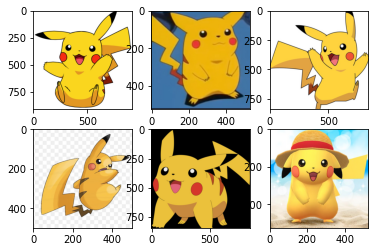

In [37]:
dir_name = os.path.join(train_dir, "Pikachu")
all_images = [os.path.join(dir_name, filename) for filename in os.listdir(dir_name)]
show_pokemon(all_images[:6])

## Image Prepossessing

In [38]:
data_gen = ImageDataGenerator(rescale = 1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)

In [39]:
training_set = data_gen.flow_from_directory(train_dir,
                                            target_size=image_size[:2],
                                            batch_size=32,
                                            class_mode='categorical',
                                            color_mode='rgb')

Found 11945 images belonging to 151 classes.


In [40]:
validation_set = data_gen.flow_from_directory(test_dir,
                                              target_size=image_size[:2],
                                              batch_size=32,
                                              class_mode='categorical',
                                              color_mode='rgb')

Found 2265 images belonging to 151 classes.


- Early Stopping: `es` Used to stop training when a monitored metric has stopped improving.
- Model Checkpoint: `ckpt` Used to save the Keras model or model weights at some frequency.
- Reduce LR On Plateau: `rlp` Used to reduce learning rate when a metric has stopped improving.

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
ckpt = ModelCheckpoint(save_modelpath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

In [42]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

model = cnn(image_size, num_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 524288)            0         
                                                                 
 dense_1 (Dense)             (None, 151)              

In [43]:
history = model.fit(
    training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = epochs, 
)

Epoch 1/35
374/374 [==============================] - ETA: 0s - loss: 4.8776 - acc: 0.0561
Epoch 1: loss improved from inf to 4.87762, saving model to model2.h5
374/374 [==============================] - 782s 2s/step - loss: 4.8776 - acc: 0.0561 - val_loss: 4.0826 - val_acc: 0.1333 - lr: 0.0010
Epoch 2/35
374/374 [==============================] - ETA: 0s - loss: 3.7241 - acc: 0.2001
Epoch 2: loss improved from 4.87762 to 3.72407, saving model to model2.h5
374/374 [==============================] - 783s 2s/step - loss: 3.7241 - acc: 0.2001 - val_loss: 3.3434 - val_acc: 0.2706 - lr: 0.0010
Epoch 3/35
374/374 [==============================] - ETA: 0s - loss: 3.0143 - acc: 0.3305
Epoch 3: loss improved from 3.72407 to 3.01433, saving model to model2.h5
374/374 [==============================] - 785s 2s/step - loss: 3.0143 - acc: 0.3305 - val_loss: 2.4896 - val_acc: 0.4194 - lr: 0.0010
Epoch 4/35
374/374 [==============================] - ETA: 0s - loss: 2.4505 - acc: 0.4395
Epoch 4: loss

<AxesSubplot:>

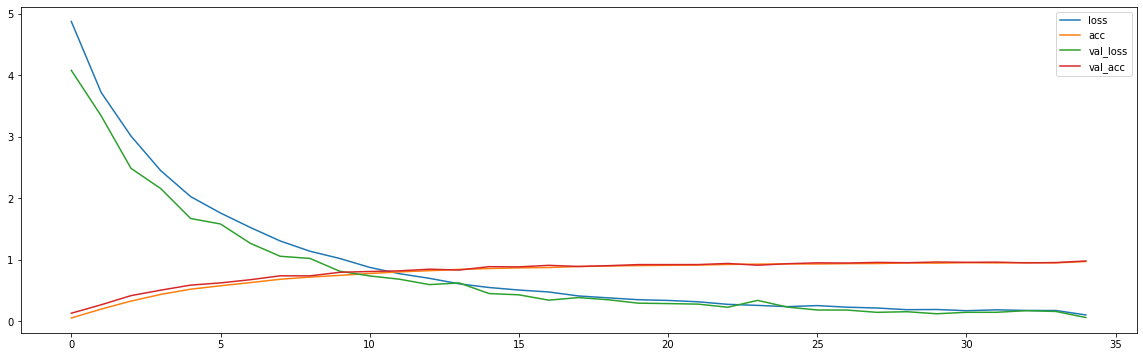

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)

# Loading Model
- Use these cells to load a pretrained model
- All models are located in the root folder with the `.h5` extension

In [5]:
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np

In [6]:
modelpath = 'model2.h5'
model = load_model(modelpath)

## Making Predictions on Single Images

In [7]:
# predicting images
classes = get_classes()
def make_prediction(imagepath):
    img = load_img(imagepath, target_size=image_size[:2])
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    prediction = model.predict(images, batch_size=10)
    i = prediction.argmax()
    return (i, classes[i], img)

1/1 [==============================] - 0s 70ms/step
95
Omastar


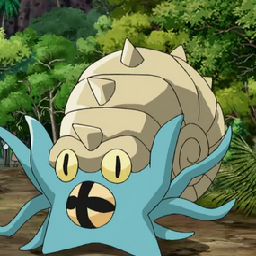

In [11]:
imagepath = 'omastar.png'
index, pokemon, img = make_prediction(imagepath)
print(index)
print(pokemon)
img